# Clustering of DIME embeddings of WSI patches

### By Elsa Jonsson, Embeddings provided by AstraZeneca

In this notebook i will take DIME embeddings of tumour patches of the Camelyon16 dataset and create a binary classifier using a Multilayer Perceptron network

### If not working in my docker container, run this line first:

In [1]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/scp/software/Python/3.9.5-GCCcore-10.3.0/bin/python3.9 -m pip install --upgrade pip' command.


### If you are working in the docker container from the resp. start here:

In [2]:
from utils import *

## Load & inspect data

In [3]:
# SIMCLR LIGHT 
folder_simclr_light_train = 'Camelyon16/simclr/light/no_cutout/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_simclr_light_test = 'Camelyon16/simclr/light/no_cutout/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'

In [5]:
embeddings_simclr_light_train, classes_simclr_light_train, patch_information_simclr_light_train = load_data(folder_simclr_light_train)
embeddings_simclr_light_train, embeddings_simclr_light_test, classes_simclr_light_train, classes_simclr_light_test, patch_information_simclr_light_train, patch_information_simclr_light_test = sort_train_test(embeddings_simclr_light_train, classes_simclr_light_train, patch_information_simclr_light_train)

In [6]:
print_data(9999, embeddings_simclr_light_train, classes_simclr_light_train, patch_information_simclr_light_train)

---------------- EMBEDDING -----------------------
[4.43824707e-03 0.00000000e+00 4.85100783e-03 0.00000000e+00
 2.73922756e-02 3.01571656e-02 1.51724024e-02 5.95806725e-02
 3.42769618e-03 2.54267566e-02 3.15727368e-02 2.71931617e-03
 9.31664195e-04 2.84320116e-02 8.63173604e-03 2.27747881e-03
 0.00000000e+00 4.80669725e-04 4.46337685e-02 6.74742600e-03
 4.14399692e-04 3.51954773e-02 1.33001041e-02 1.03076110e-02
 1.14928354e-02 1.10553280e-01 6.96658790e-02 2.01214738e-02
 9.43408906e-03 6.24747155e-03 2.41223611e-02 2.64235977e-02
 1.71344052e-03 3.92564610e-02 0.00000000e+00 7.46504345e-04
 8.37331638e-02 8.93504843e-02 5.47695346e-02 8.93978588e-03
 6.99995371e-06 2.26742849e-02 1.46311626e-01 1.86508149e-01
 1.27776444e-03 9.75845847e-03 7.27771688e-03 0.00000000e+00
 2.89722383e-02 0.00000000e+00 2.07755645e-03 1.79124661e-02
 0.00000000e+00 1.64572373e-01 9.56555479e-04 6.21350529e-03
 7.58787864e-05 1.38266250e-01 6.12072460e-02 7.94471949e-02
 2.62525752e-02 1.85896140e-02 7.4

In [7]:
print("-----------NUM simclr_light EMBEDDINGS TRAIN-------------")
print(len(embeddings_simclr_light_train))
print("-----------NUM simclr_light EMBEDDINGS TEST-------------")
print(len(embeddings_simclr_light_test))
print("------------------------")

-----------NUM simclr_light EMBEDDINGS TRAIN-------------
1353990
-----------NUM simclr_light EMBEDDINGS TEST-------------
701967
------------------------


## MULTI-LAYER PERCEPTRON

### Hyperparameter optimization

In [9]:
hidden_layer_sizes = (100,)
activation = 'relu'
solver = 'adam'
alpha = 0.0001
learning_rate = 'constant'
X, y = percentage_dataset(embeddings_simclr_light_train, classes_simclr_light_train, 0.05)
hidden_layer_sizes, activation, solver, alpha, learning_rate = run_HypPar_MLP(X,y)

### Percentage tests

/home/kzmq426/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---------------------------------------
PERCENTAGE: 10.0% OF DATASET, NUMBER EMBEDDINGS: 135399
HYPERPARAMETERS: HIDDEN LAYER SIZES = (100,), ACTIVATION = relu, SOLVER = adam, ALPHA = 0.0001, LEARNING RATE = constant
RUNTIME IN SEC: 1691.1300055980682
ACCURACY:
0.961731819302047
AUC & ROC CURVE:


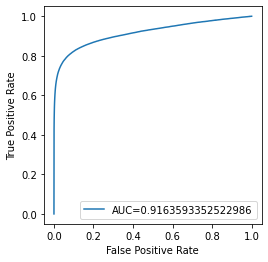

PRECISION RECALL CURVE:


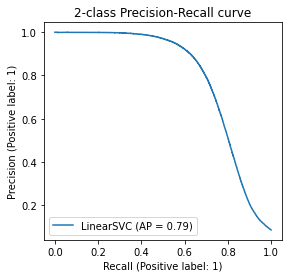

CONFUSION MATRIX:


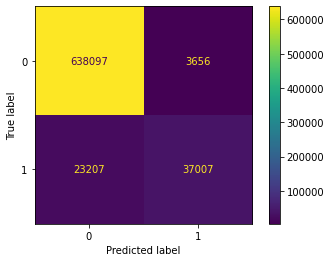

---------------------------------------


In [10]:
run_Percentage_MLP(embeddings_simclr_light_train, classes_simclr_light_train, embeddings_simclr_light_test, classes_simclr_light_test, [0.1], hidden_layer_sizes, activation, solver, alpha, learning_rate)